In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('DiamondPricesData.csv')
data

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [3]:
data_new=data.drop_duplicates()

In [4]:
print('Shape After deleting duplicate values:', data_new.shape)

Shape After deleting duplicate values: (53794, 10)


In [5]:
print('Shape After deleting duplicate values:', data_new.shape)

Shape After deleting duplicate values: (53794, 10)


<Axes: >

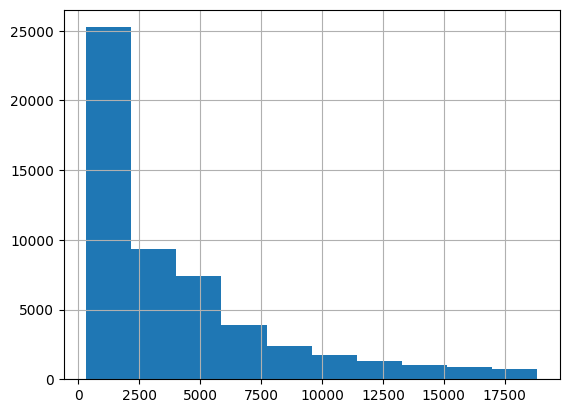

In [6]:
data_new['price'].hist()

In [7]:
data_new.dtypes

price        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [8]:
data_new.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


In [9]:
missing_values=data_new.isnull().sum()
missing_values

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [8]:
cont_data=data_new.select_dtypes(exclude='object')
cont_data.head()

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75


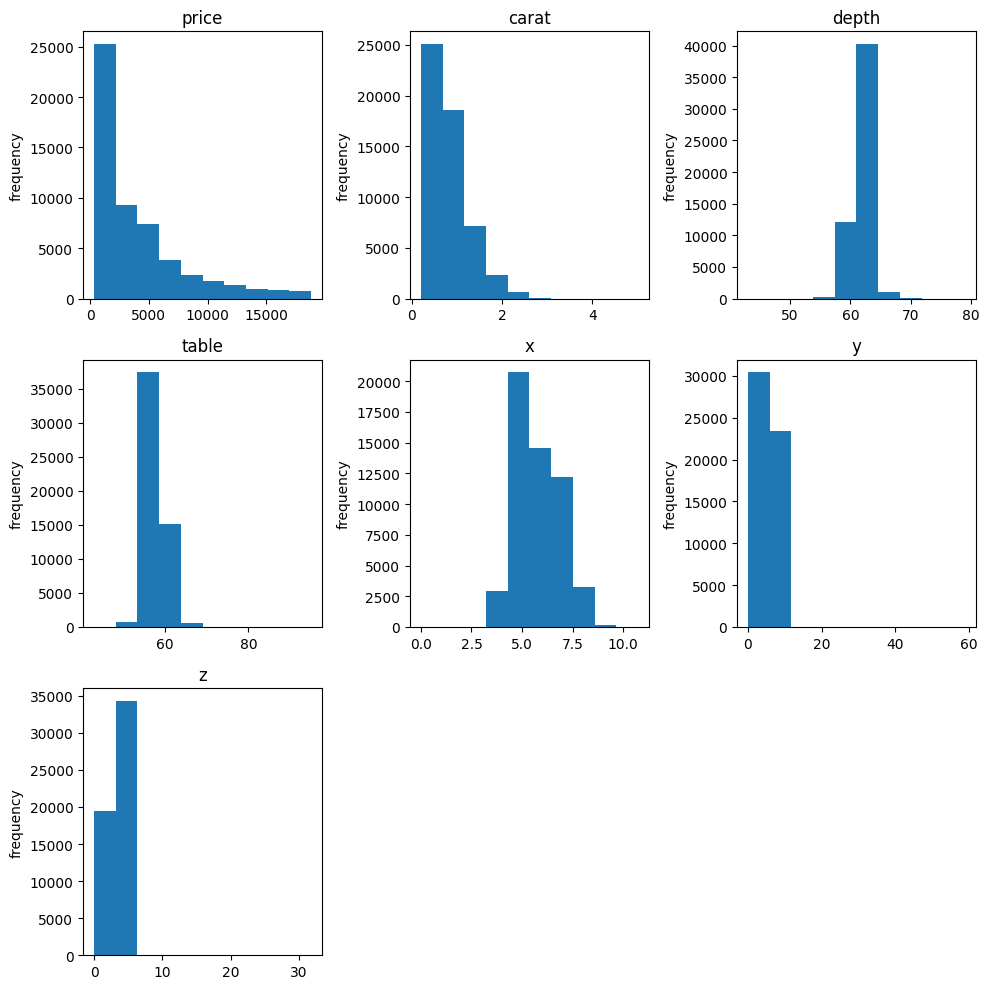

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(data_new[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

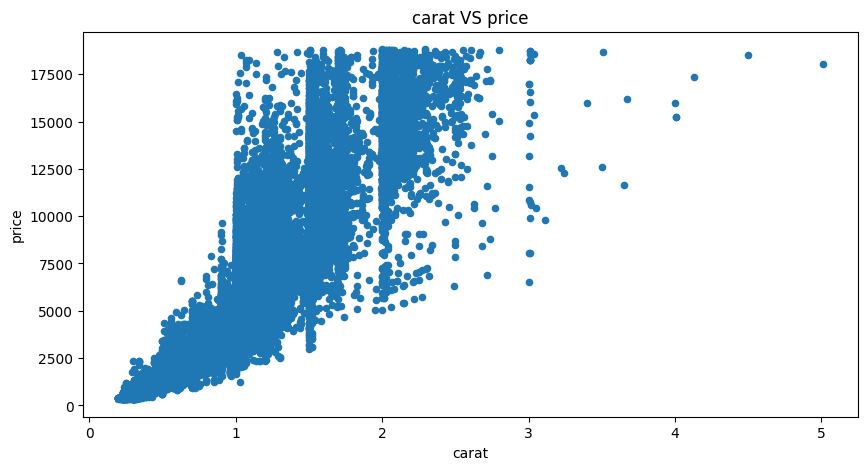

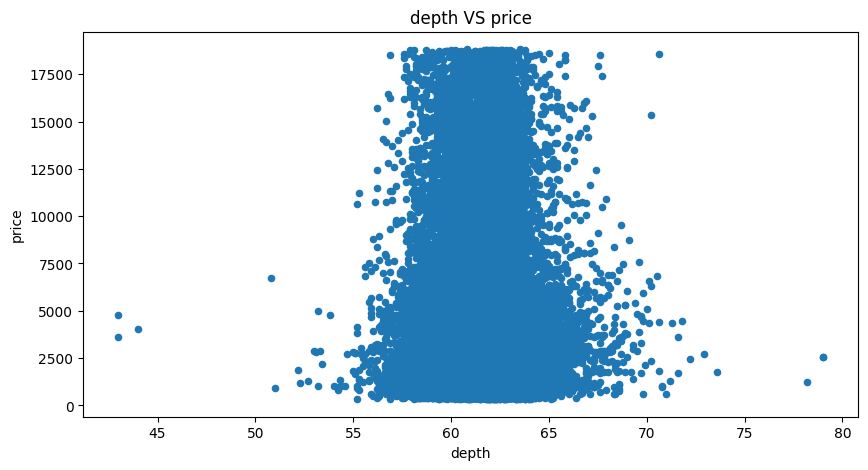

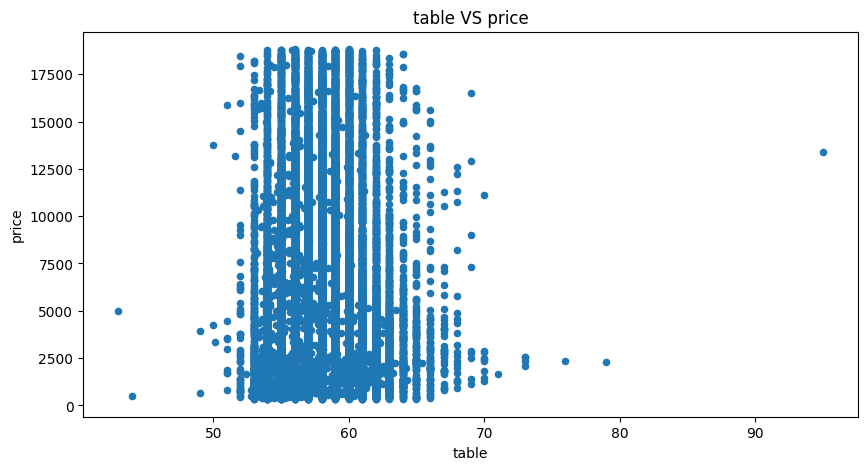

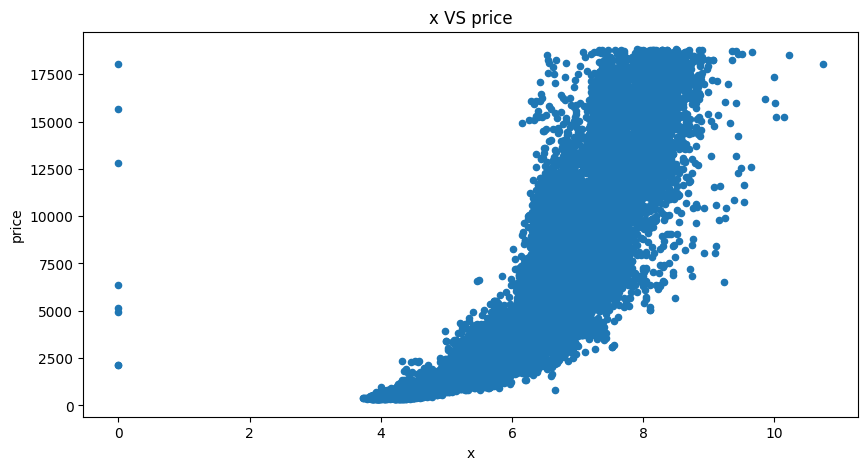

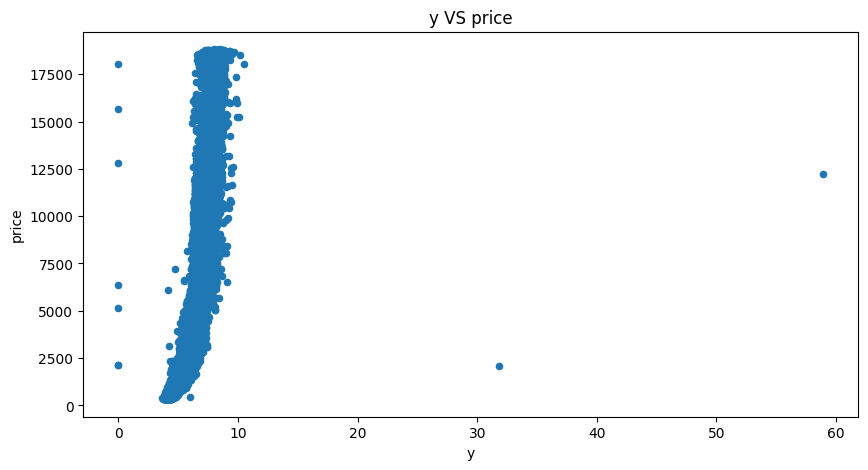

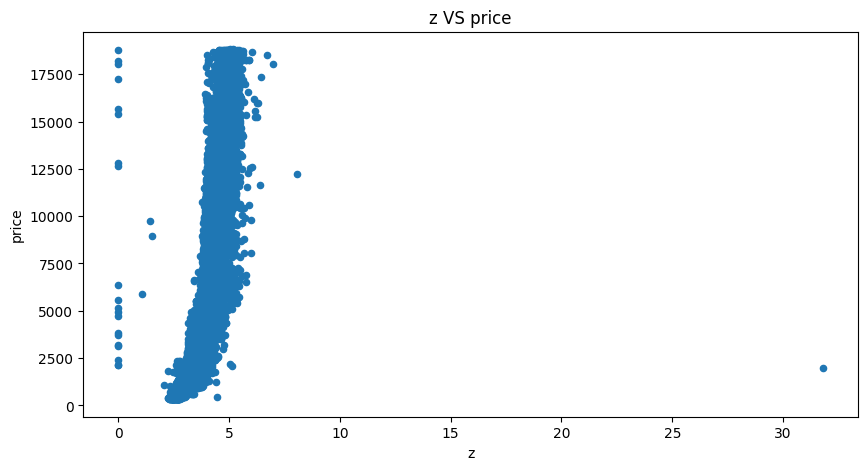

In [12]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

OUTLIERS
data= pd.series({"values":[20,20,21,12,34,20,47]})
data

use the code for plotting the histogram using matiplot and replace his with box plot, 

when we are removing outliers
def remove_outliers(columns):
   for column in columns:
       lower_quantile= data[column].quantile(.25)
       upper_quantile = data[column].quantile(.)




In [13]:

data= pd.DataFrame({"values":[2,20,20,21,12,34,20,47,26,20]})
data

,values
0,2
1,20
2,20
3,21
4,12
5,34
6,20
7,47
8,26
9,20


CHECKING FOR OUTLIERS

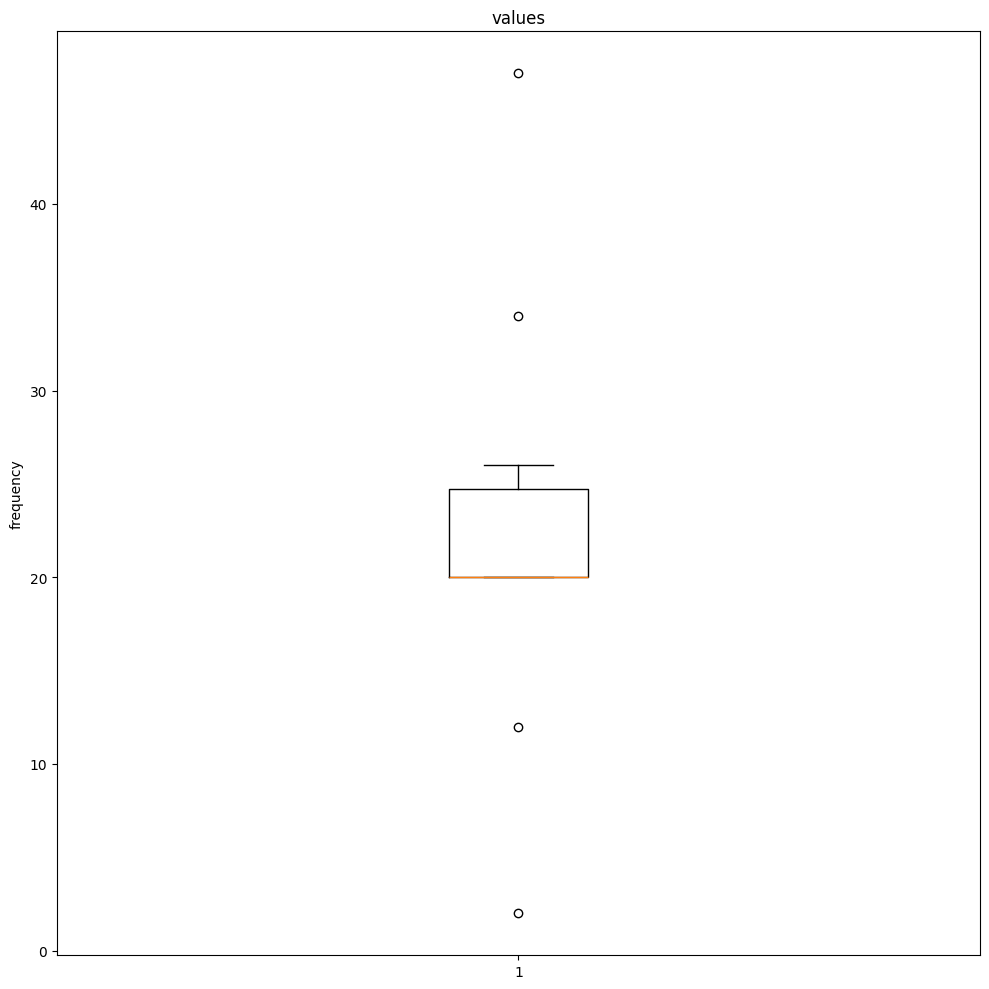

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, col in enumerate(data.columns):
    plt.boxplot(data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

Quantiles, IQR, Boundaries, fitting the outliers into the data frames

In [15]:
import numpy as np
def remove_outliers(columns):
   for column in columns:
       lower_quantile= data[column].quantile(.25)
       upper_quantile = data[column].quantile(.75)

       IQR= upper_quantile-lower_quantile

       upper_boundary = upper_quantile+1.5*IQR
       lower_boundary = lower_quantile-1.5*IQR
# trying to fit the out liers into the data frame
       data[column]= np.where(data[column]>upper_boundary, upper_boundary, data[column])
       data[column]= np.where(data[column]<lower_boundary, lower_boundary, data[column])




In [16]:
remove_outliers(["values"])

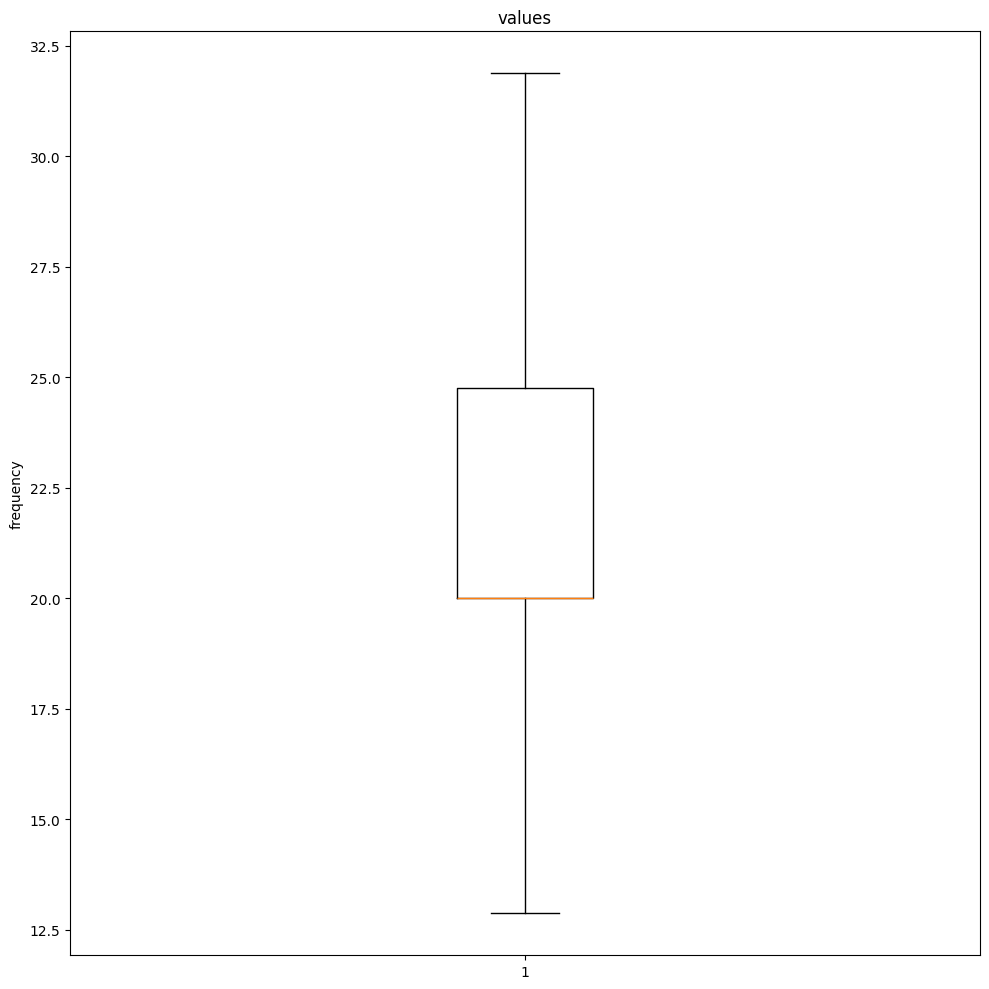

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, col in enumerate(data.columns):
    plt.boxplot(data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

In [18]:
cont_data = data_new.select_dtypes(exclude="object")
cont_data.head()

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75


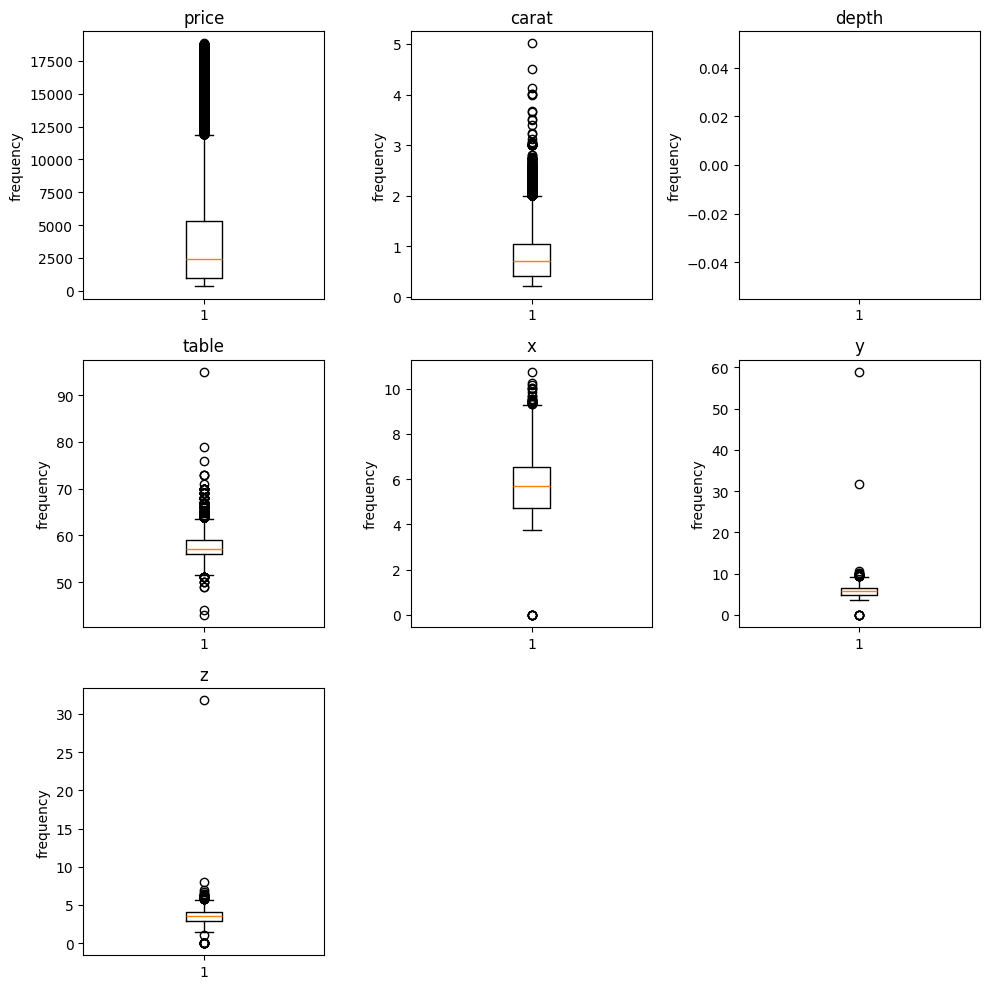

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

In [20]:
import numpy as np
def remove_outliers(columns):
   for column in columns:
       lower_quantile= cont_data[column].quantile(.25)
       upper_quantile = cont_data[column].quantile(.75)

       IQR= upper_quantile-lower_quantile

       upper_boundary = upper_quantile+1.5*IQR
       lower_boundary = lower_quantile-1.5*IQR
# trying to fit the out liers into the data frame
       cont_data[column]= np.where(cont_data[column]>upper_boundary, upper_boundary, cont_data[column])
       cont_data[column]= np.where(cont_data[column]<lower_boundary, lower_boundary, cont_data[column])

In [21]:
remove_outliers(["price","carat","depth","table","x","y","z"])

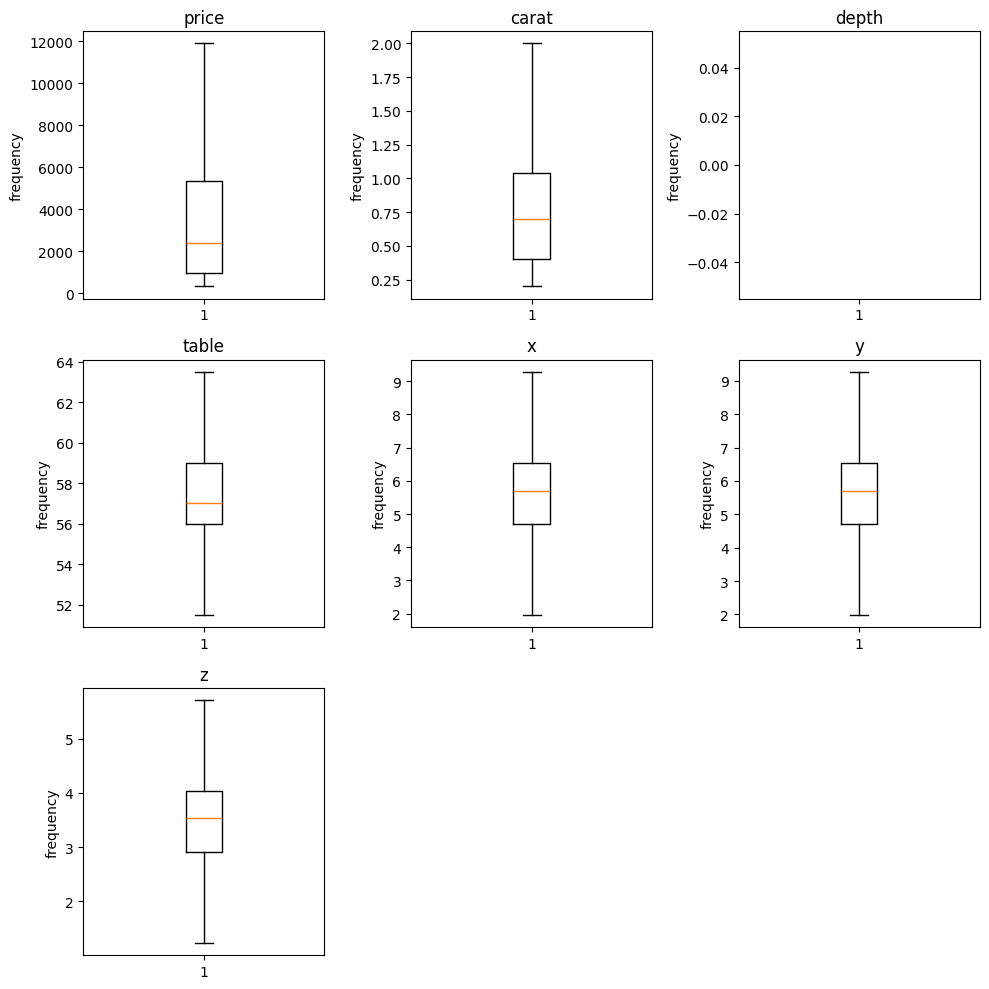

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

SAVING PERSONAL WORK

In [23]:
cont_data.to_excel("Kahunde_data.xlsx")

SIGNIFICANT RELATIONSHIP
DATATYPE 1     DATATYPE2         TEST         VISUALIZATION

CONT            CONT            CORRMATRIX      SCATTER PLOT
CONT            CAT              ANOVA           BOXPLOTS
CAT            CAT              CHI-SQUARE contiguengy        BARPLOTS

P>0.05  the two values are not correlating with each other hence rejection
p<0.05 the two values are correlated 

In [24]:
#Cont Vs cont
# grouping our cont data
cont_data.head()

,price,carat,depth,table,x,y,z
0,326.0,0.23,61.50,55.0,3.95,3.98,2.43
1,326.0,0.21,59.80,61.0,3.89,3.84,2.31
2,327.0,0.23,58.75,63.5,4.05,4.07,2.31
3,334.0,0.29,62.40,58.0,4.20,4.23,2.63
4,335.0,0.31,63.30,58.0,4.34,4.35,2.75


In [25]:
import seaborn as sns


<Axes: >

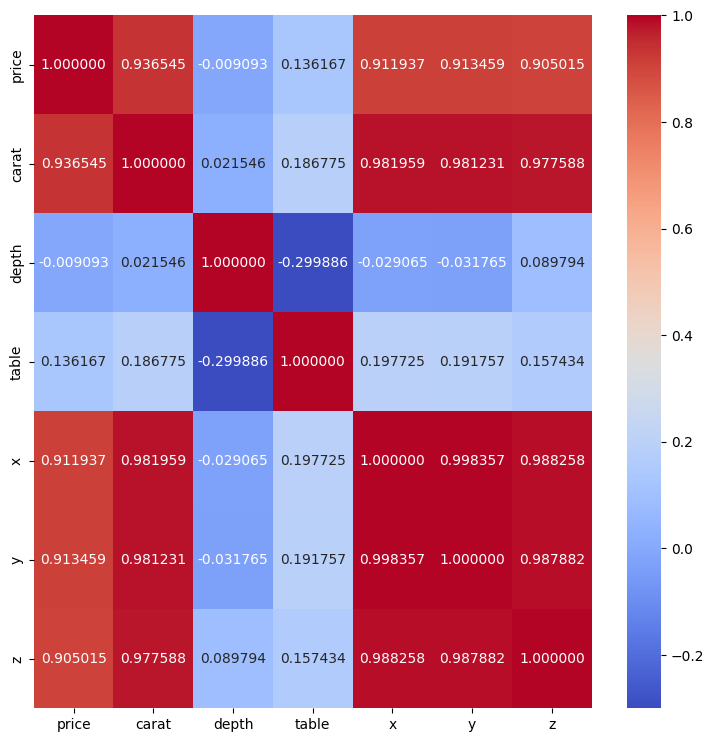

In [26]:
corr_matrix= cont_data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='2f')

Vizualizing with scatter plot

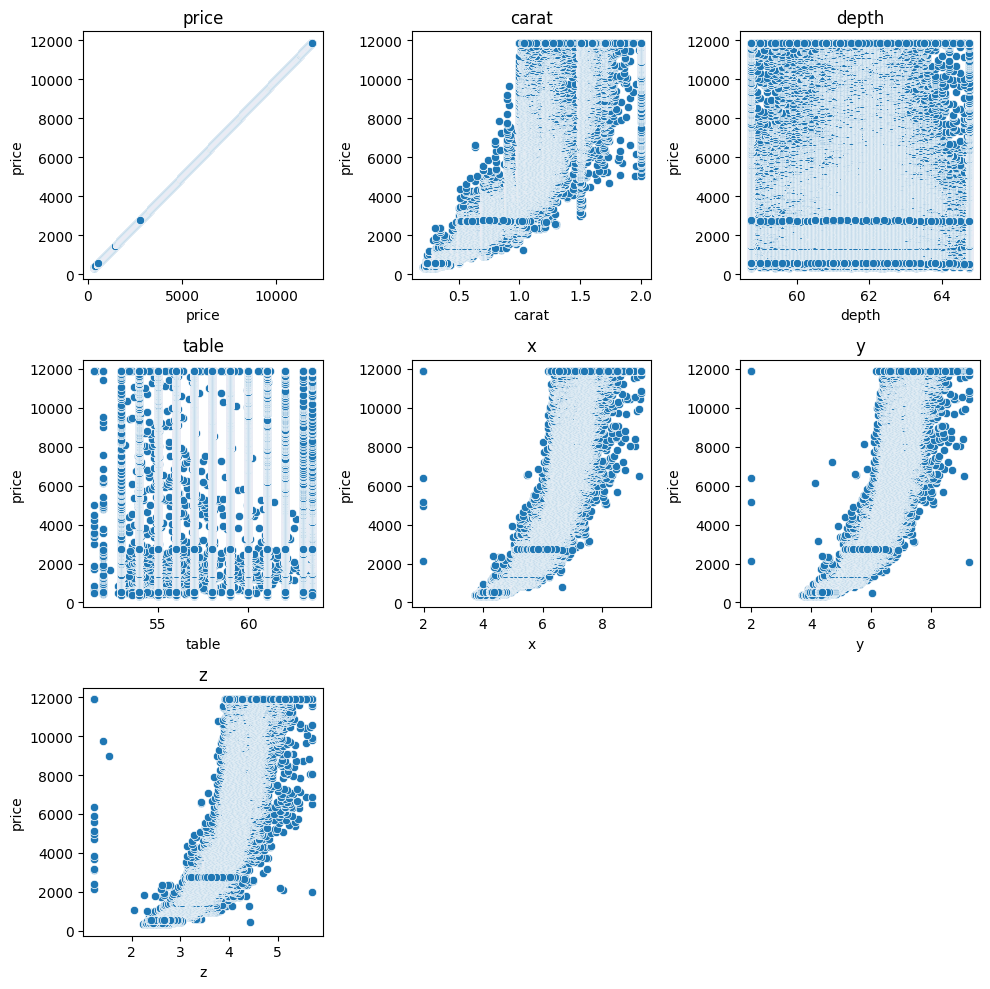

In [27]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(cont_data, y='price', x=col)
    plt.title(col)
    plt.ylabel(f"price")
plt.tight_layout()
plt.show()

['z'.'y','x','carat']are correlated with price

CONT AND CAT

In [28]:
from scipy.stats import f_oneway 
#for boxplot
def combined_boxplots(data, varl, var2):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=data[varl], y=data[var2])
    plt.xlabel(f"{varl}")
    plt.ylabel(f"{var2}")
    plt.title(f'Boxplot of {varl} vs {var2}')

    plt.show()
    
# for the ANOVA Test
def Anova_test(data, var1,var2):
    group_data=[
        group[var1].values for _, group in data. groupby(var2)
    ]
    f_stats, p_value= f_oneway(*group_data)
    if p_value >0.05:
        print(f"{var1} is not significantly correlated with {var2}")
    else:
        print(f"{var1} is significantly correlated with {var2}")


In [29]:
cat_data_diamond=data_new.select_dtypes(include='object')

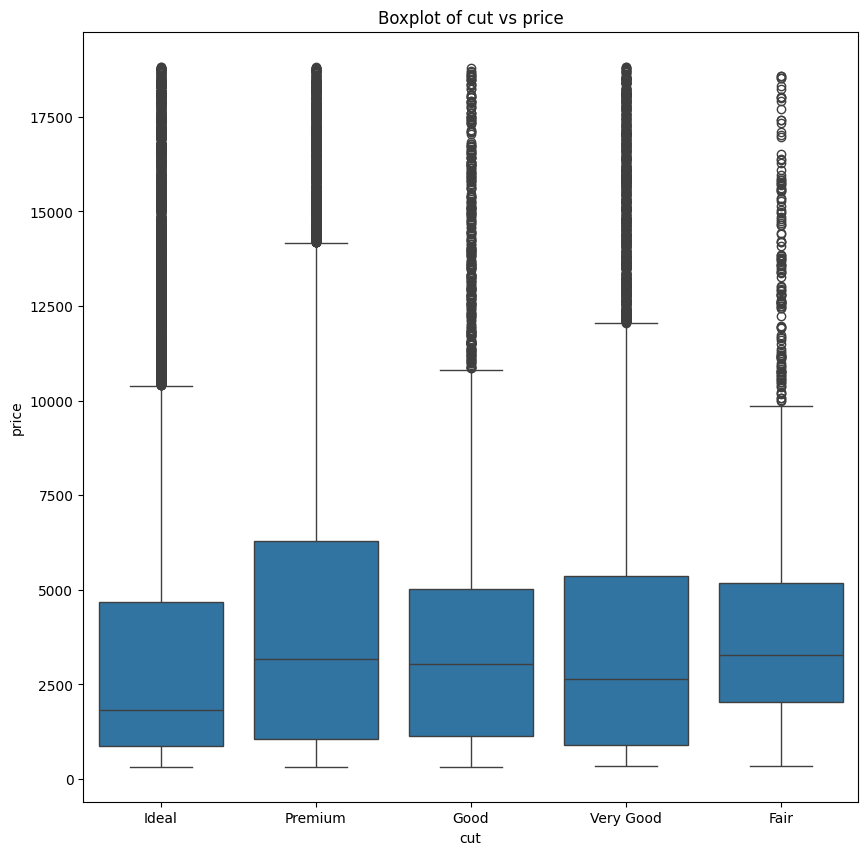

price is significantly correlated with cut


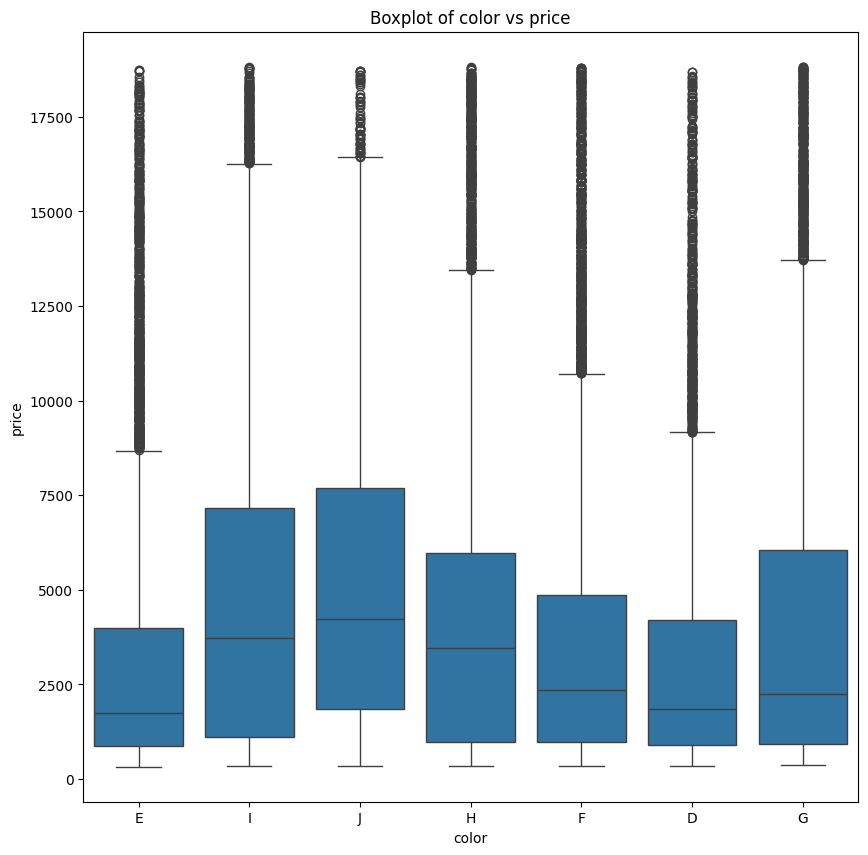

price is significantly correlated with color


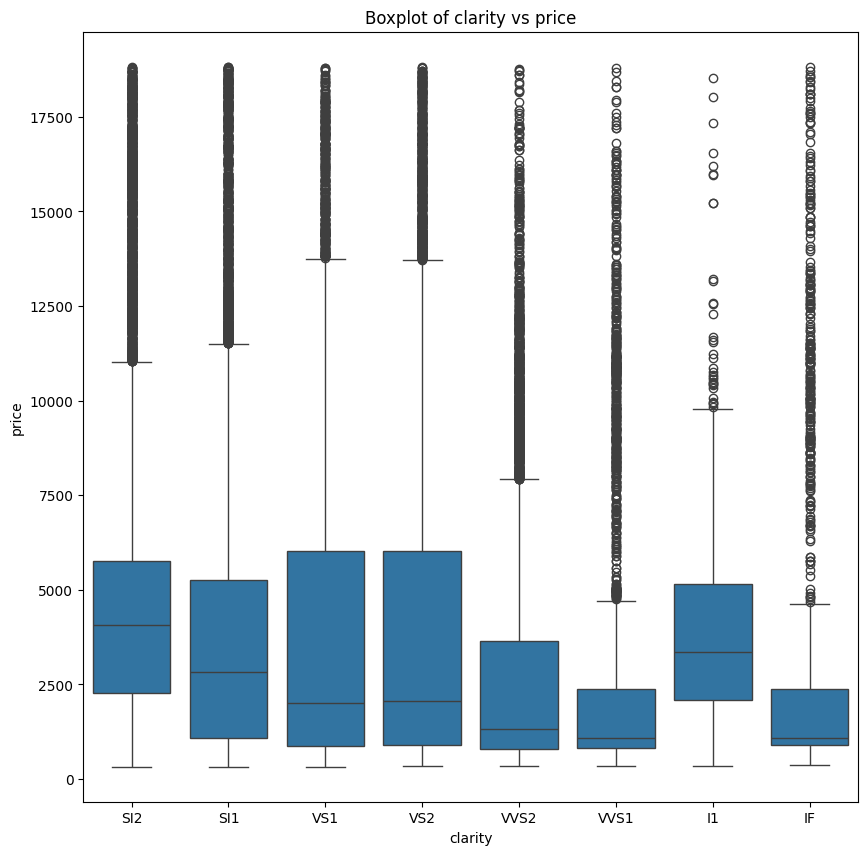

price is significantly correlated with clarity


In [30]:
for i in cat_data_diamond.columns:
    combined_boxplots(data_new, i, 'price')
    Anova_test(data_new,"price", i)

 CAT VS CAT
 GENERATING A CONTIGENCY TABLE

In [31]:
catdata= cat_data_diamond.select_dtypes(include='object')
catdata

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [32]:
contiguency_table =pd.crosstab(cat_data_diamond['cut'], cat_data_diamond['color'])
contiguency_table

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,222,309,311,299,174,119
Good,660,931,908,869,699,518,306
Ideal,2823,3893,3819,4863,3104,2090,894
Premium,1599,2331,2321,2917,2351,1422,806
Very Good,1510,2399,2163,2296,1819,1203,677


<Axes: xlabel='color', ylabel='cut'>

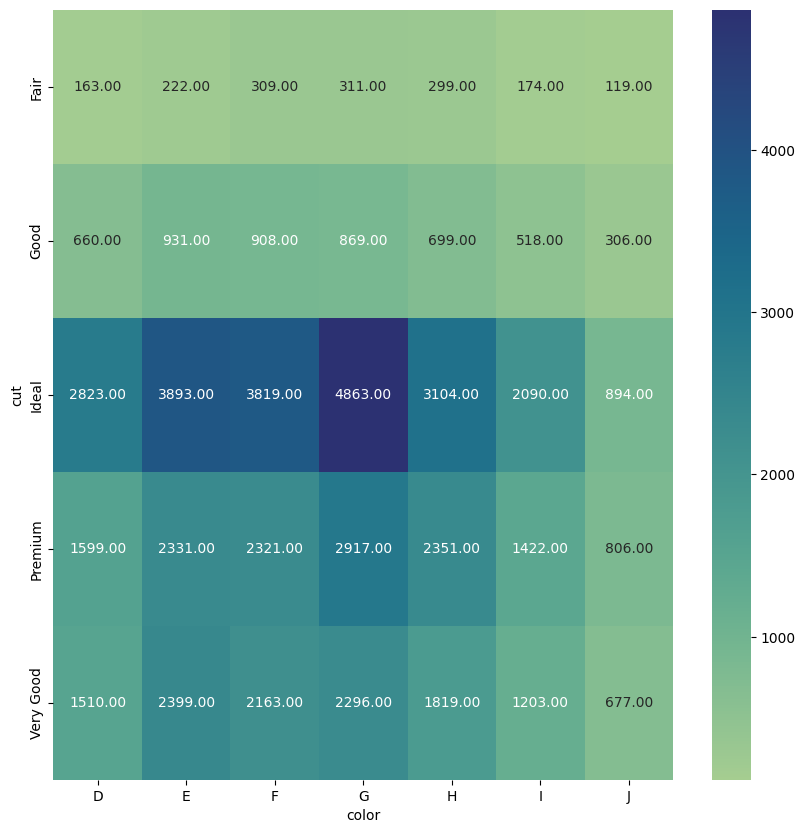

In [33]:

plt.figure(figsize=(10,10))
sns.heatmap(contiguency_table, annot=True, cmap='crest', fmt='.2f')

In [34]:
from scipy.stats import chi2_contingency
import warnings

warnings. filterwarnings('ignore')
chi2, p, dof, expected =chi2_contingency(contiguency_table)

print(f"Expected:{expected}\n Chi-square stat: {chi2}\n p-value:{p}\n Degree of Freedom:{dof}")

Expected:[[ 200.56025508  290.25567041  282.65486726  334.19781364  245.60095189
   160.53727597   83.19316576]
 [ 614.23932847  888.94206886  865.66371681 1023.52004164  752.18175058
   491.66425597  254.78883766]
 [2698.33289953 3905.09288317 3802.83185841 4496.28943259 3304.30936268
  2159.86469101 1119.27887261]
 [1726.42568974 2498.5251729  2433.09734513 2876.77980219 2114.13668476
  1381.90728415  716.12802112]
 [1515.44182717 2193.18420466 2135.75221239 2525.21290994 1855.77125009
  1213.0264929   628.61110285]]
 Chi-square stat: 307.4494835211058
 p-value:5.287278705988795e-51
 Degree of Freedom:24


Our goal is to use the p value to find out whether they are correlated or not.

In [35]:
if p >0.05:
        print(f"color is not significantly correlated with cut")
else:
        print(f"color is significantly correlated with cut")


color is significantly correlated with cut


Visualization of the Correlation

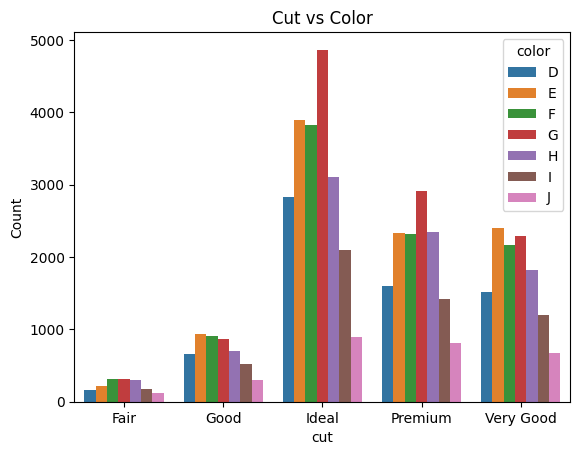

In [36]:
## RESETING THE INDEX
contiguency_table_reset= contiguency_table.reset_index()

# melting the df
melted_dataframe= contiguency_table_reset.melt(id_vars='cut',var_name='color',value_name='Count')
sns.barplot(x='cut', y='Count',hue='color', data=melted_dataframe)
plt.title('Cut vs Color')
plt.xlabel('cut')
plt.ylabel('Count')
plt.show()

In [40]:
def analyze_categorical_features(df, feature1, feature2):
    # Create contingency table
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"Expected:{expected}\n Chi-square stat: {chi2}\n p-value:{p}\n Degree of Freedom:{dof}")
    
    # Determine significance
    if p > 0.05:
        print(f"{feature2} is not significantly correlated with {feature1}")
    else:
        print(f"{feature2} is significantly correlated with {feature1}")
    
    # Create bar plot
    contingency_table_reset = contingency_table.reset_index()
    melted_dataframe = contingency_table_reset.melt(id_vars=feature1, var_name=feature2, value_name='Count')
    sns.barplot(x=feature1, y='Count', hue=feature2, data=melted_dataframe)
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel('Count')
    plt.show()

Expected:[[  21.98237722   52.99535264  387.12748634  271.80912369  242.28144403
   363.27363647  108.33747258  150.19310704]
 [  67.28148121  162.20292226 1184.88143659  831.92642302  741.551028
  1111.87193739  331.58859724  459.69617429]
 [ 295.59281704  712.61835892 5205.62917798 3654.96523776 3257.91218351
  4884.87102651 1456.79324832 2019.61794996]
 [ 189.11997621  455.93248318 3330.5561215  2338.44294903 2084.40881883
  3125.33539056  932.05480165 1292.14945905]
 [ 166.02334833  400.250883   2923.8057776  2052.8562665  1829.84652563
  2743.64800907  818.22588021 1134.34330966]]
 Chi-square stat: 4368.367573054015
 p-value:0.0
 Degree of Freedom:28
clarity is significantly correlated with cut


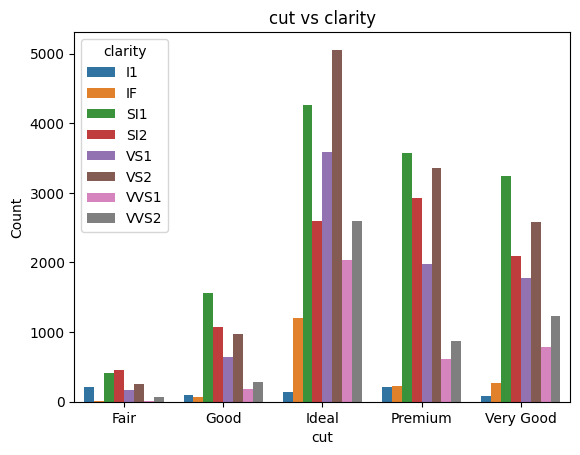

In [41]:
analyze_categorical_features(cat_data_diamond, 'cut', 'clarity')

MACHINE LEARNING

This is basically when a computer learns from the algorithm and improve automatically through experience by the use of data.